В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [43]:
cars_df = pd.read_csv("../../data/cars.csv")
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [45]:
print("Типи даних колонок:")
print(cars_df.dtypes)

print("\nФактичні типи даних у колонках:")
for col in cars_df.columns:
    unique_types = cars_df[col].map(type).unique()
    print(f"{col}: {unique_types}")

print("\nКількість унікальних значень у категоріальних колонках:")
for col in cars_df.select_dtypes(include=["object"]).columns:
    print(f"{col}: {cars_df[col].nunique()}")

Типи даних колонок:
Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

Фактичні типи даних у колонках:
Car_ID: [<class 'int'>]
Brand: [<class 'str'>]
Model: [<class 'str'>]
Year: [<class 'int'>]
Kilometers_Driven: [<class 'int'>]
Fuel_Type: [<class 'str'>]
Transmission: [<class 'str'>]
Owner_Type: [<class 'str'>]
Mileage: [<class 'int'>]
Engine: [<class 'int'>]
Power: [<class 'int'>]
Seats: [<class 'int'>]
Price: [<class 'int'>]

Кількість унікальних значень у категоріальних колонках:
Brand: 11
Model: 58
Fuel_Type: 2
Transmission: 2
Owner_Type: 3


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [46]:
X = cars_df.drop("Price", axis=1)
y = cars_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [47]:
X_train['Fuel_Type_Code'] = (X_train['Fuel_Type'] == X_train['Fuel_Type'].value_counts().idxmax()).astype(int)
X_test['Fuel_Type_Code'] = (X_test['Fuel_Type'] == X_train['Fuel_Type'].value_counts().idxmax()).astype(int)

X_train['Transmission_Code'] = (X_train['Transmission'] == X_train['Transmission'].value_counts().idxmax()).astype(int)
X_test['Transmission_Code'] = (X_test['Transmission'] == X_train['Transmission'].value_counts().idxmax()).astype(int)

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train[['Brand']])
X_test_ohe = ohe.transform(X_test[['Brand']])

brand_cols = ohe.get_feature_names_out(['Brand'])
X_train = X_train.drop('Brand', axis=1)
X_test = X_test.drop('Brand', axis=1)

X_train[brand_cols] = X_train_ohe
X_test[brand_cols] = X_test_ohe

In [48]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [49]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

Кореляція з цільовою змінною понад 0.5:
Power                0.849137
Engine               0.710561
Transmission_Code    0.680731
Mileage              0.638404
Name: Price, dtype: float64


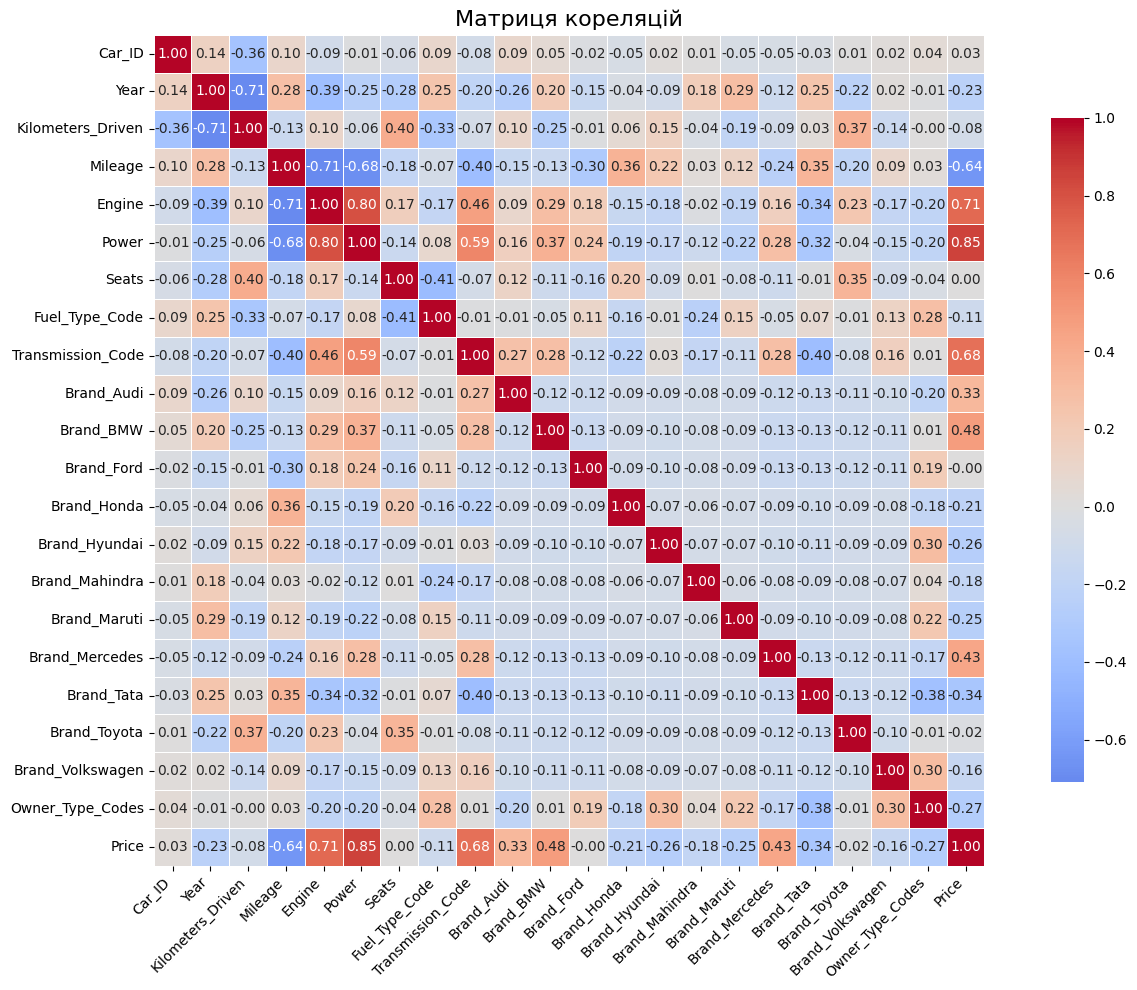

In [52]:
X_num = X_train.select_dtypes(include='number')

train_with_target = pd.concat([X_num, y_train], axis=1)

corr_matrix = train_with_target.corr()

target_corr = corr_matrix['Price'].drop('Price').abs()
high_corr = target_corr[target_corr > 0.5]

print("Кореляція з цільовою змінною понад 0.5:")
print(high_corr.sort_values(ascending=False))

X_num = X_train.select_dtypes(include='number')
df_corr = pd.concat([X_num, y_train], axis=1)

corr_matrix = df_corr.corr().round(2)

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0, 
    linewidths=0.5, 
    square=True, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Матриця кореляцій", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Висновок**
- Найбільшу кореляцію з цільовою змінною Price мають:
      Power: 0.84
      Engine: 0.71
      Transmission_Code: 0.68
      Mileage: 0.63

отже можуть мати сильний вплив на ціну авто та є важливими для побудови моделі

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [53]:
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

model = LinearRegression()
model.fit(X_train_num, y_train)

y_train_pred = model.predict(X_train_num)
y_test_pred = model.predict(X_test_num)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE (train): {rmse_train:.2f}")
print(f"RMSE (test): {rmse_test:.2f}")

RMSE (train): 210293.58
RMSE (test): 258181.56


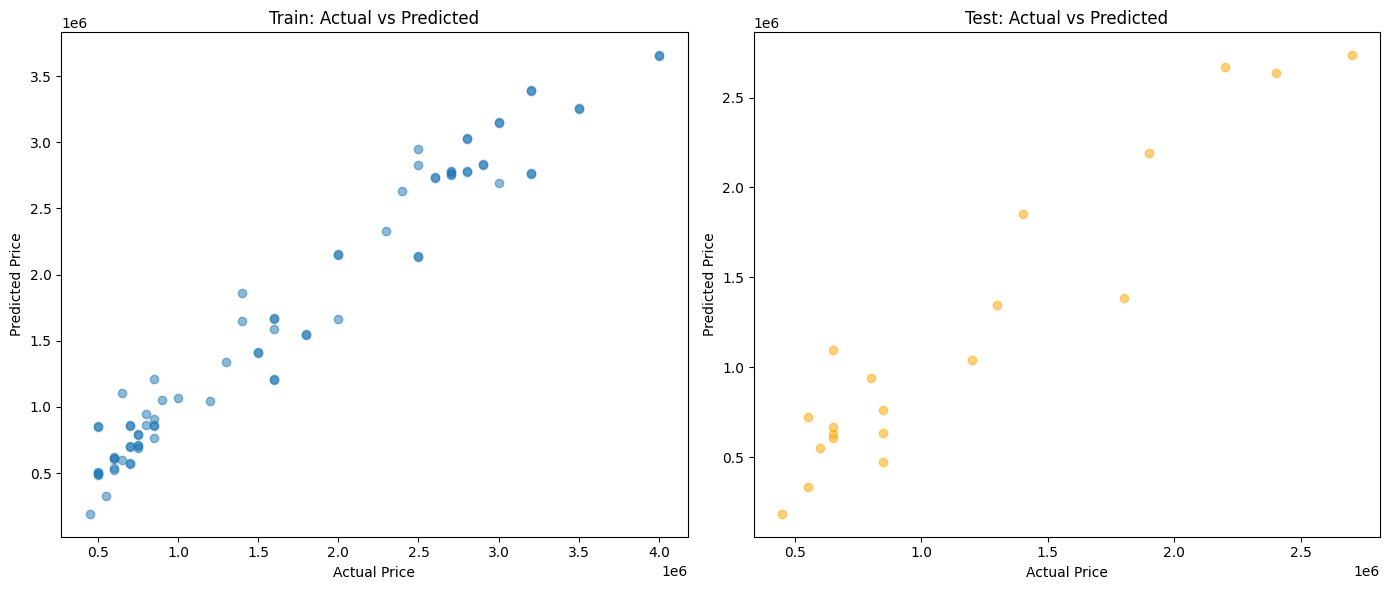

In [54]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Train: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='orange')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Test: Actual vs Predicted")

plt.tight_layout()
plt.show()

**Висновок**
Train RMSE: 240293.58
Test RMSE: 258181.56
- Різниця між train і test помірна, отже модель не переобучена, але й не ідеально точна
- Train показує хорошу лінійну залежність: більшість точок лежать схлже на трейн
- Test — прогнозування гірше, більша розкиданість, але тренд зберігається
- Потенційно вважаю потрібно покращувати, бо виглядає що ми на правильному шляху але далеко не ідеально

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

coefficients = pd.Series(model_scaled.coef_, index=X_train_num.columns)
coefficients_sorted = coefficients.sort_values(key=abs, ascending=False)

print("Найвпливовіші змінні за модулем:")
print(coefficients_sorted.head(10))

Найвпливовіші змінні за модулем:
Power                496769.214899
Brand_Mercedes       210048.781148
Brand_BMW            208407.313783
Brand_Audi           205600.147769
Fuel_Type_Code      -183848.018909
Brand_Hyundai       -152304.863911
Brand_Mahindra      -140945.162904
Mileage             -131715.512030
Brand_Ford          -118209.450311
Transmission_Code    116693.768206
dtype: float64


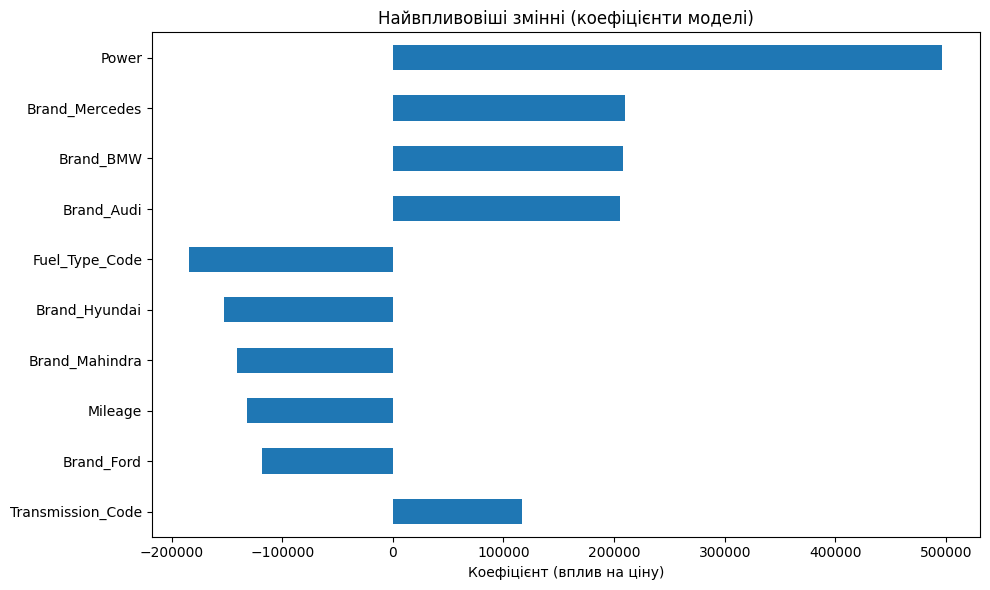

In [59]:
plt.figure(figsize=(10, 6))
coefficients_sorted.head(10).plot(kind='barh')
plt.title("Найвпливовіші змінні (коефіцієнти моделі)")
plt.xlabel("Коефіцієнт (вплив на ціну)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Висновок**
Найвпливовіші змінні:
 - Power — найбільший позитивний вплив (логічно: чим потужніше авто, тим вища ціна)
 - Brand_Mercedes / BMW / Audi — істотно підвищують ціну (бренди преміум-класу)
 - Fuel_Type_Code — має негативний вплив: можливо, 0 відповідає дизелю, який дешевший
 - Mileage — чим більше пробіг, тим менша ціна
 - Brand_Ford / Mahindra / Hyundai — негативний вплив (можливо, дешевші бренди)
 - Transmission_Code — позитивний вплив: виглядає як автоматична коробка збільшує ціну

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [64]:
X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        23:41:22   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   2.74e+04     61.363      0.0

In [65]:
significant = model_sm.pvalues[model_sm.pvalues < 0.05]
print("Значущі змінні (p < 0.05):")
print(significant)

Значущі змінні (p < 0.05):
const    3.734558e-55
x4       2.760048e-02
x6       1.343837e-08
x8       1.639420e-04
x9       1.022962e-02
x10      7.485851e-09
x11      1.669757e-08
x12      8.736558e-04
x14      2.204650e-06
x15      1.354686e-05
x16      2.875539e-04
x17      9.320195e-09
x20      2.993263e-03
dtype: float64


In [66]:
for i, col in enumerate(X_train_num.columns):
    print(f"x{i+1} → {col}")

x1 → Car_ID
x2 → Year
x3 → Kilometers_Driven
x4 → Mileage
x5 → Engine
x6 → Power
x7 → Seats
x8 → Fuel_Type_Code
x9 → Transmission_Code
x10 → Brand_Audi
x11 → Brand_BMW
x12 → Brand_Ford
x13 → Brand_Honda
x14 → Brand_Hyundai
x15 → Brand_Mahindra
x16 → Brand_Maruti
x17 → Brand_Mercedes
x18 → Brand_Tata
x19 → Brand_Toyota
x20 → Brand_Volkswagen
x21 → Owner_Type_Codes


**Висновок**
- x4 → Mileage
- x6 → Power
- x8 → Fuel_Type_Code
- x9 → Transmission_Code
- x10 → Brand_Audi
- x11 → Brand_BMW
- x12 → Brand_Ford
- x14 → Brand_Hyundai
- x15 → Brand_Mahindra
- x16 → Brand_Maruti
- x17 → Brand_Mercedes
- x20 → Brand_Volkswagen

В цілому підтверджує попередній висновок

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [70]:
significant_cols = [
    'Mileage', 'Power', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai',
    'Brand_Mahindra', 'Brand_Mercedes', 'Brand_Maruti', 'Brand_Tata',
    'Brand_Toyota', 'Brand_Volkswagen', 'Transmission_Code'
]

X_train_scaled_df = pd.DataFrame(X_train_scaled, index=y_train.index, columns=X_train_num.columns)
X_train_sig = X_train_scaled_df[significant_cols]

X_train_sig_const = sm.add_constant(X_train_sig)

model_sig = sm.OLS(y_train, X_train_sig_const).fit()

print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     79.76
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           4.11e-35
Time:                        23:52:10   Log-Likelihood:                -1108.8
No. Observations:                  80   AIC:                             2246.
Df Residuals:                      66   BIC:                             2279.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   3.11e+0

**Висновок**
- R² = 0.940 (було 0.959 у повній моделі)
- Adj. R² = 0.928 (було 0.945)

- показники змінилися не значно на мій погляд
- спрощена модель на статистично значущих змінних пояснює трохи менше дисперсії цільової змінної, але значно спрощена
- в цілому виглядає що модель стала стабільнішою

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [73]:
pval_df = pd.DataFrame({
    'feature': ['const'] + list(X_train_num.columns),
    'pval': model_sm.pvalues.values
})

selected_features = pval_df.query('pval < 0.25 and feature != "const"')['feature'].tolist()

X_train_scaled_df = pd.DataFrame(X_train_scaled, index=y_train.index, columns=X_train_num.columns)
X_train_p25 = X_train_scaled_df[selected_features]

X_train_p25_const = sm.add_constant(X_train_p25)
model_p25 = sm.OLS(y_train, X_train_p25_const).fit()

print(model_p25.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        23:58:06   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

**Висновок**
- майже ідентично до повної моделі з Завдання 7 (R² = 0.959, Adj. R² = 0.945)
- краще, ніж у моделі лише з p < 0.05 (Завдання 9: R² = 0.940, Adj. R² = 0.928)

- пом’якшення критерію (p < 0.25) дозволило залишити більше змінних, що в данному випадку виглядає непогано

- я би більше говорила про останню модель, тому що вона залишає більше змінних, що може бути більш зрозуміліше та інформативно
- можливо повна модель, але також з доопрацюванням